In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [2]:
weather_df = pd.read_csv('Bhubaneswar.csv', parse_dates=['date'], index_col='date')
weather_df.head(5)

,Unnamed: 0,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
date,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,0,18.356500,86.737820,16.106500,19.253540,0.0,0.0,0.0,0.0,1014.4,1008.83093,8.099999,9.0,0.0,0.0,8.287822,19.373219,34.380400,41.987130,13.679999
2010-01-01 01:00:00+00:00,1,17.906500,84.229370,15.206500,18.417564,0.0,0.0,0.0,0.0,1015.0,1009.41910,11.100000,5.0,0.0,22.0,8.496305,19.862083,36.384450,43.531270,15.480000
2010-01-01 02:00:00+00:00,2,18.656500,76.075195,14.356501,18.553125,0.0,0.0,0.0,0.0,1016.2,1010.62680,0.900000,1.0,0.0,0.0,10.514218,19.855560,38.047092,44.999897,20.880001
2010-01-01 03:00:00+00:00,3,20.256500,62.675670,12.906500,19.355250,0.0,0.0,0.0,0.0,1017.2,1011.65140,0.900000,1.0,0.0,0.0,12.475961,17.848160,46.169064,48.270576,28.080000
2010-01-01 04:00:00+00:00,4,21.956501,54.644337,12.406500,20.680676,0.0,0.0,0.0,0.0,1017.6,1012.08124,0.000000,0.0,0.0,0.0,13.896187,18.792550,53.426876,53.569054,31.319998


In [3]:
weather_df.columns

Index(['Unnamed: 0', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')

In [4]:
weather_df.shape

(123936, 20)

In [5]:
weather_df.describe()

,Unnamed: 0,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.0,123936.0,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000
mean,61967.500000,26.553983,76.805474,21.533467,30.327661,0.193659,0.193659,0.0,0.0,1007.804038,1002.420342,33.727173,14.185935,17.609339,41.229142,9.258899,15.172404,180.907593,177.795348,19.624139
std,35777.385818,4.787866,18.410347,4.608767,6.139402,0.893671,0.893671,0.0,0.0,6.012542,5.934685,32.335958,25.057420,26.870045,43.430253,4.940686,7.762251,88.667714,83.849477,9.507741
min,0.000000,9.456500,8.852308,1.302500,7.676276,0.000000,0.000000,0.0,0.0,969.700000,964.516400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.939169,0.603083,1.080000
25%,30983.750000,24.156500,65.456371,18.302500,26.757390,0.000000,0.000000,0.0,0.0,1003.000000,997.647160,3.300000,0.000000,0.000000,0.000000,5.692100,9.227524,128.659840,125.134280,12.240000
50%,61967.500000,26.856500,82.500822,23.506500,31.608694,0.000000,0.000000,0.0,0.0,1008.000000,1002.648130,26.700000,2.000000,5.000000,19.000000,8.209263,14.529915,195.124050,195.851990,18.359999
75%,92951.250000,29.302500,91.621284,25.156500,34.218266,0.000000,0.000000,0.0,0.0,1012.900000,1007.405800,54.600000,16.000000,23.000000,95.000000,12.074766,20.188908,225.748930,222.510400,25.560000
max,123935.000000,43.706500,100.000000,29.452500,48.345770,53.700000,53.700000,0.0,0.0,1023.000000,1017.437000,100.000000,100.000000,100.000000,100.000000,75.919890,114.060930,360.000000,360.000000,133.920000


In [6]:
weather_df.isnull().any()

Unnamed: 0              False
temperature_2m          False
relative_humidity_2m    False
dew_point_2m            False
apparent_temperature    False
precipitation           False
rain                    False
snowfall                False
snow_depth              False
pressure_msl            False
surface_pressure        False
cloud_cover             False
cloud_cover_low         False
cloud_cover_mid         False
cloud_cover_high        False
wind_speed_10m          False
wind_speed_100m         False
wind_direction_10m      False
wind_direction_100m     False
wind_gusts_10m          False
dtype: bool

In [7]:
weather_df_num=weather_df.loc[:,['temperature_2m','cloud_cover','relative_humidity_2m','apparent_temperature','snowfall', 'precipitation', 'pressure_msl','wind_speed_10m','wind_speed_100m','wind_direction_10m','wind_direction_100m']]
weather_df_num.head()

,temperature_2m,cloud_cover,relative_humidity_2m,apparent_temperature,snowfall,precipitation,pressure_msl,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
date,,,,,,,,,,,
2010-01-01 00:00:00+00:00,18.356500,8.099999,86.737820,19.253540,0.0,0.0,1014.4,8.287822,19.373219,34.380400,41.987130
2010-01-01 01:00:00+00:00,17.906500,11.100000,84.229370,18.417564,0.0,0.0,1015.0,8.496305,19.862083,36.384450,43.531270
2010-01-01 02:00:00+00:00,18.656500,0.900000,76.075195,18.553125,0.0,0.0,1016.2,10.514218,19.855560,38.047092,44.999897
2010-01-01 03:00:00+00:00,20.256500,0.900000,62.675670,19.355250,0.0,0.0,1017.2,12.475961,17.848160,46.169064,48.270576
2010-01-01 04:00:00+00:00,21.956501,0.000000,54.644337,20.680676,0.0,0.0,1017.6,13.896187,18.792550,53.426876,53.569054


In [8]:
weather_df_num.shape

(123936, 11)

In [9]:
weather_df_num.columns

Index(['temperature_2m', 'cloud_cover', 'relative_humidity_2m',
       'apparent_temperature', 'snowfall', 'precipitation', 'pressure_msl',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m'],
      dtype='object')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

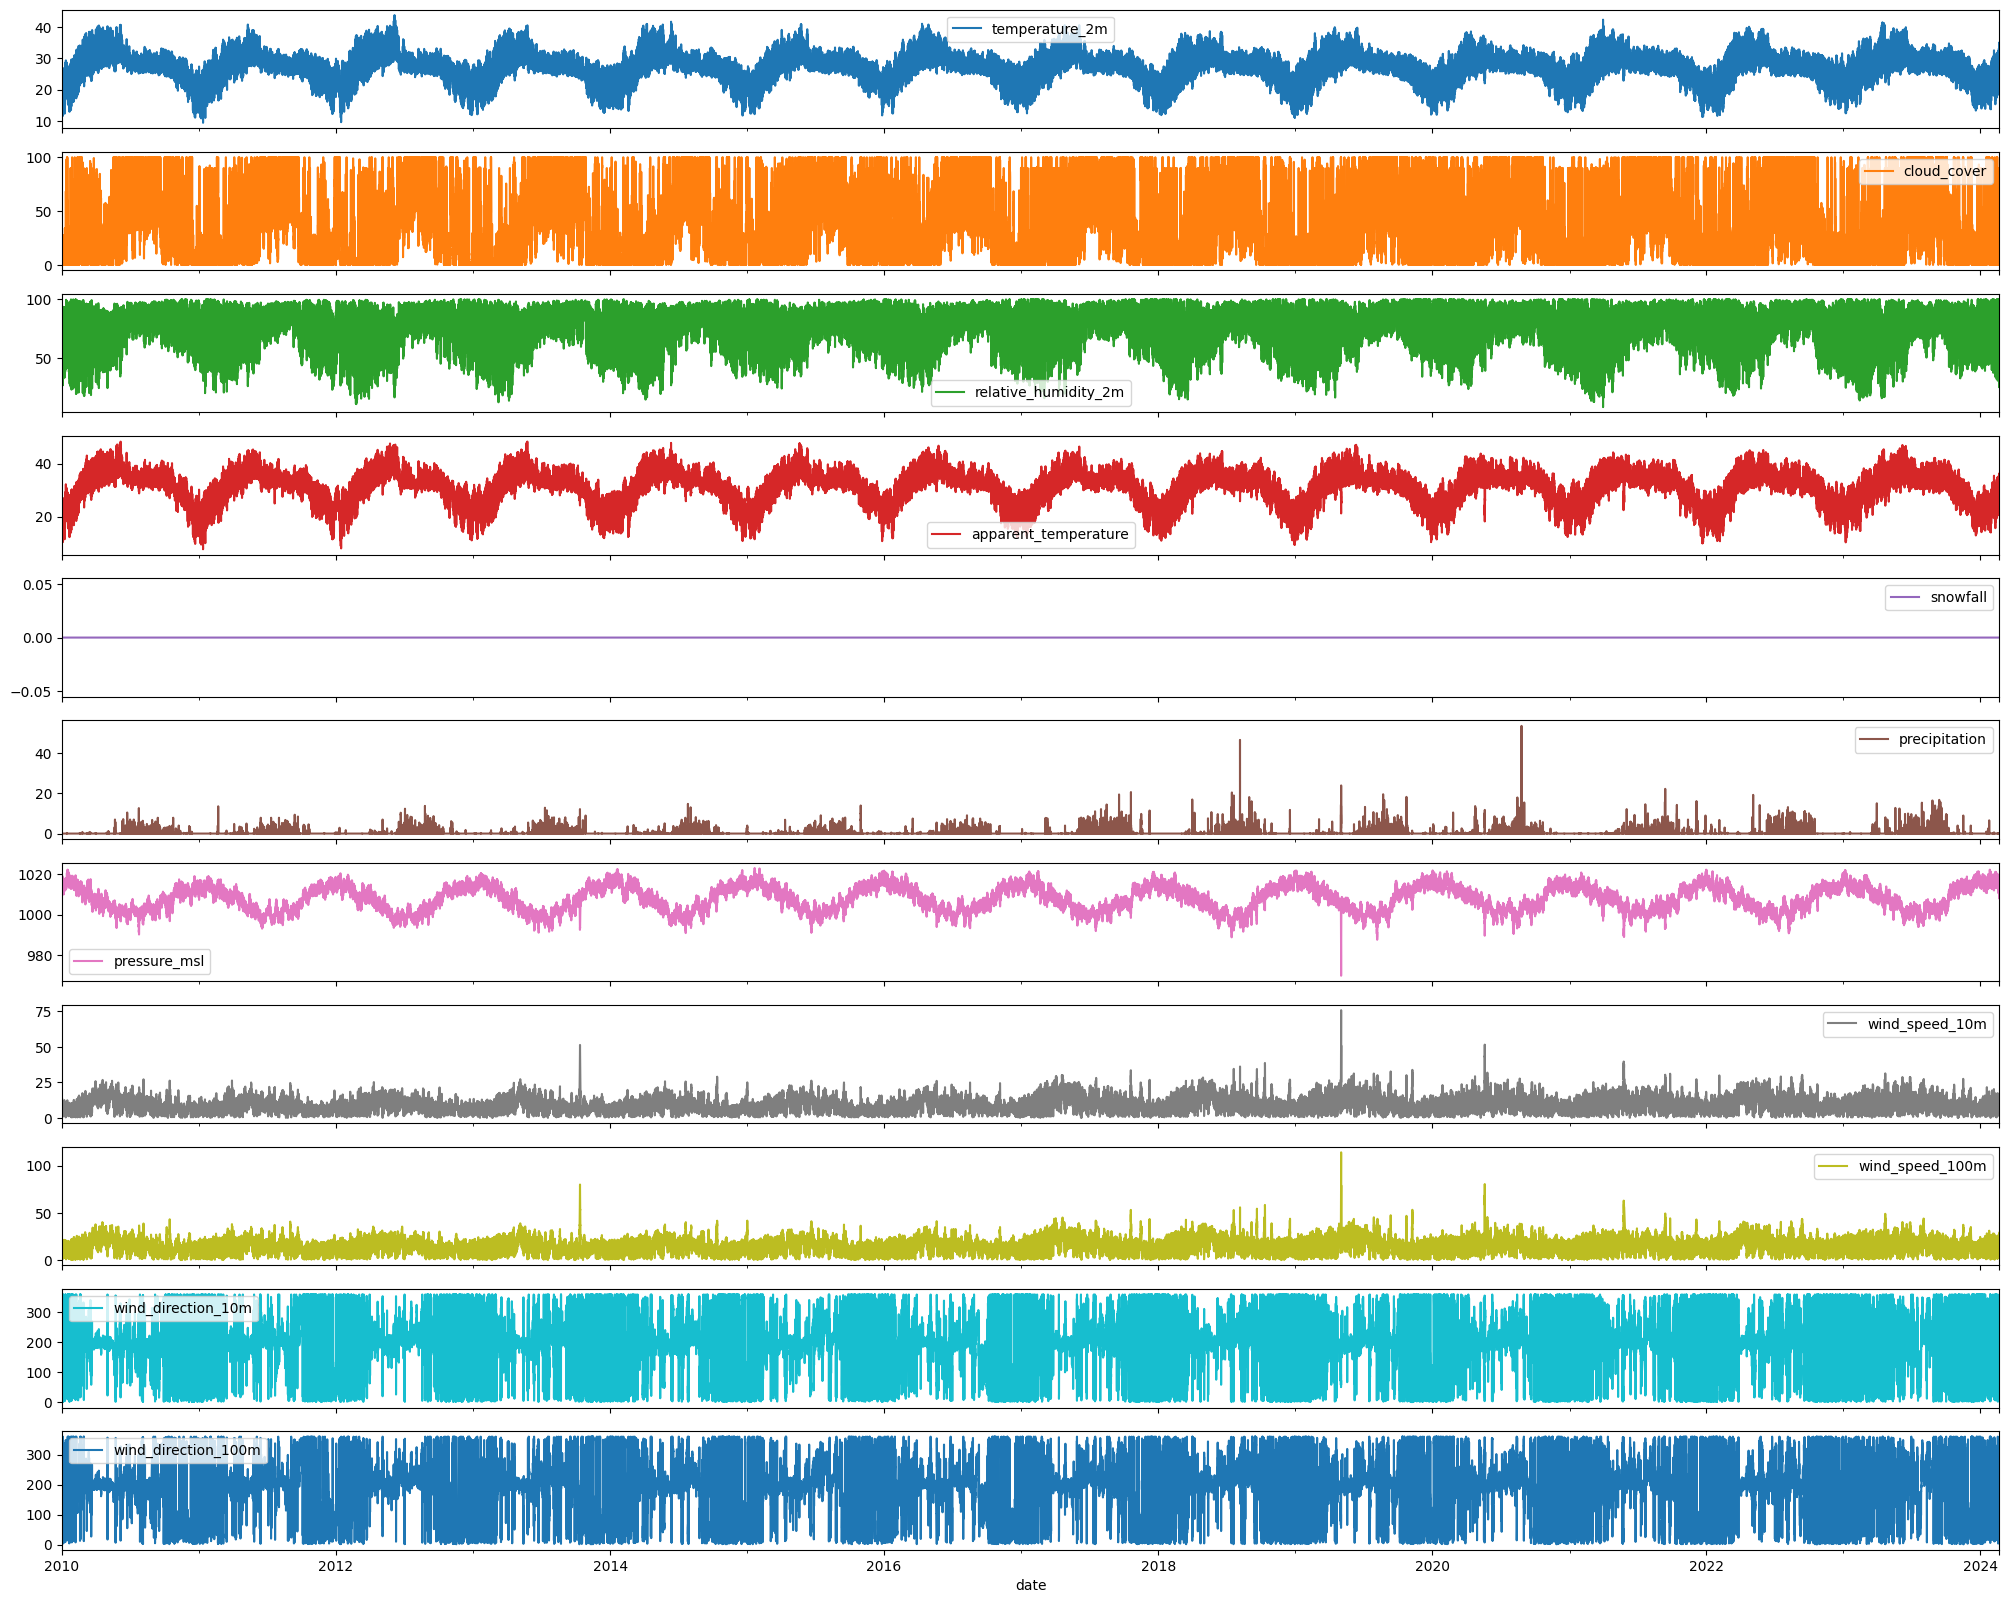

In [10]:
weather_df_num.plot(subplots=True, figsize=(25,20))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

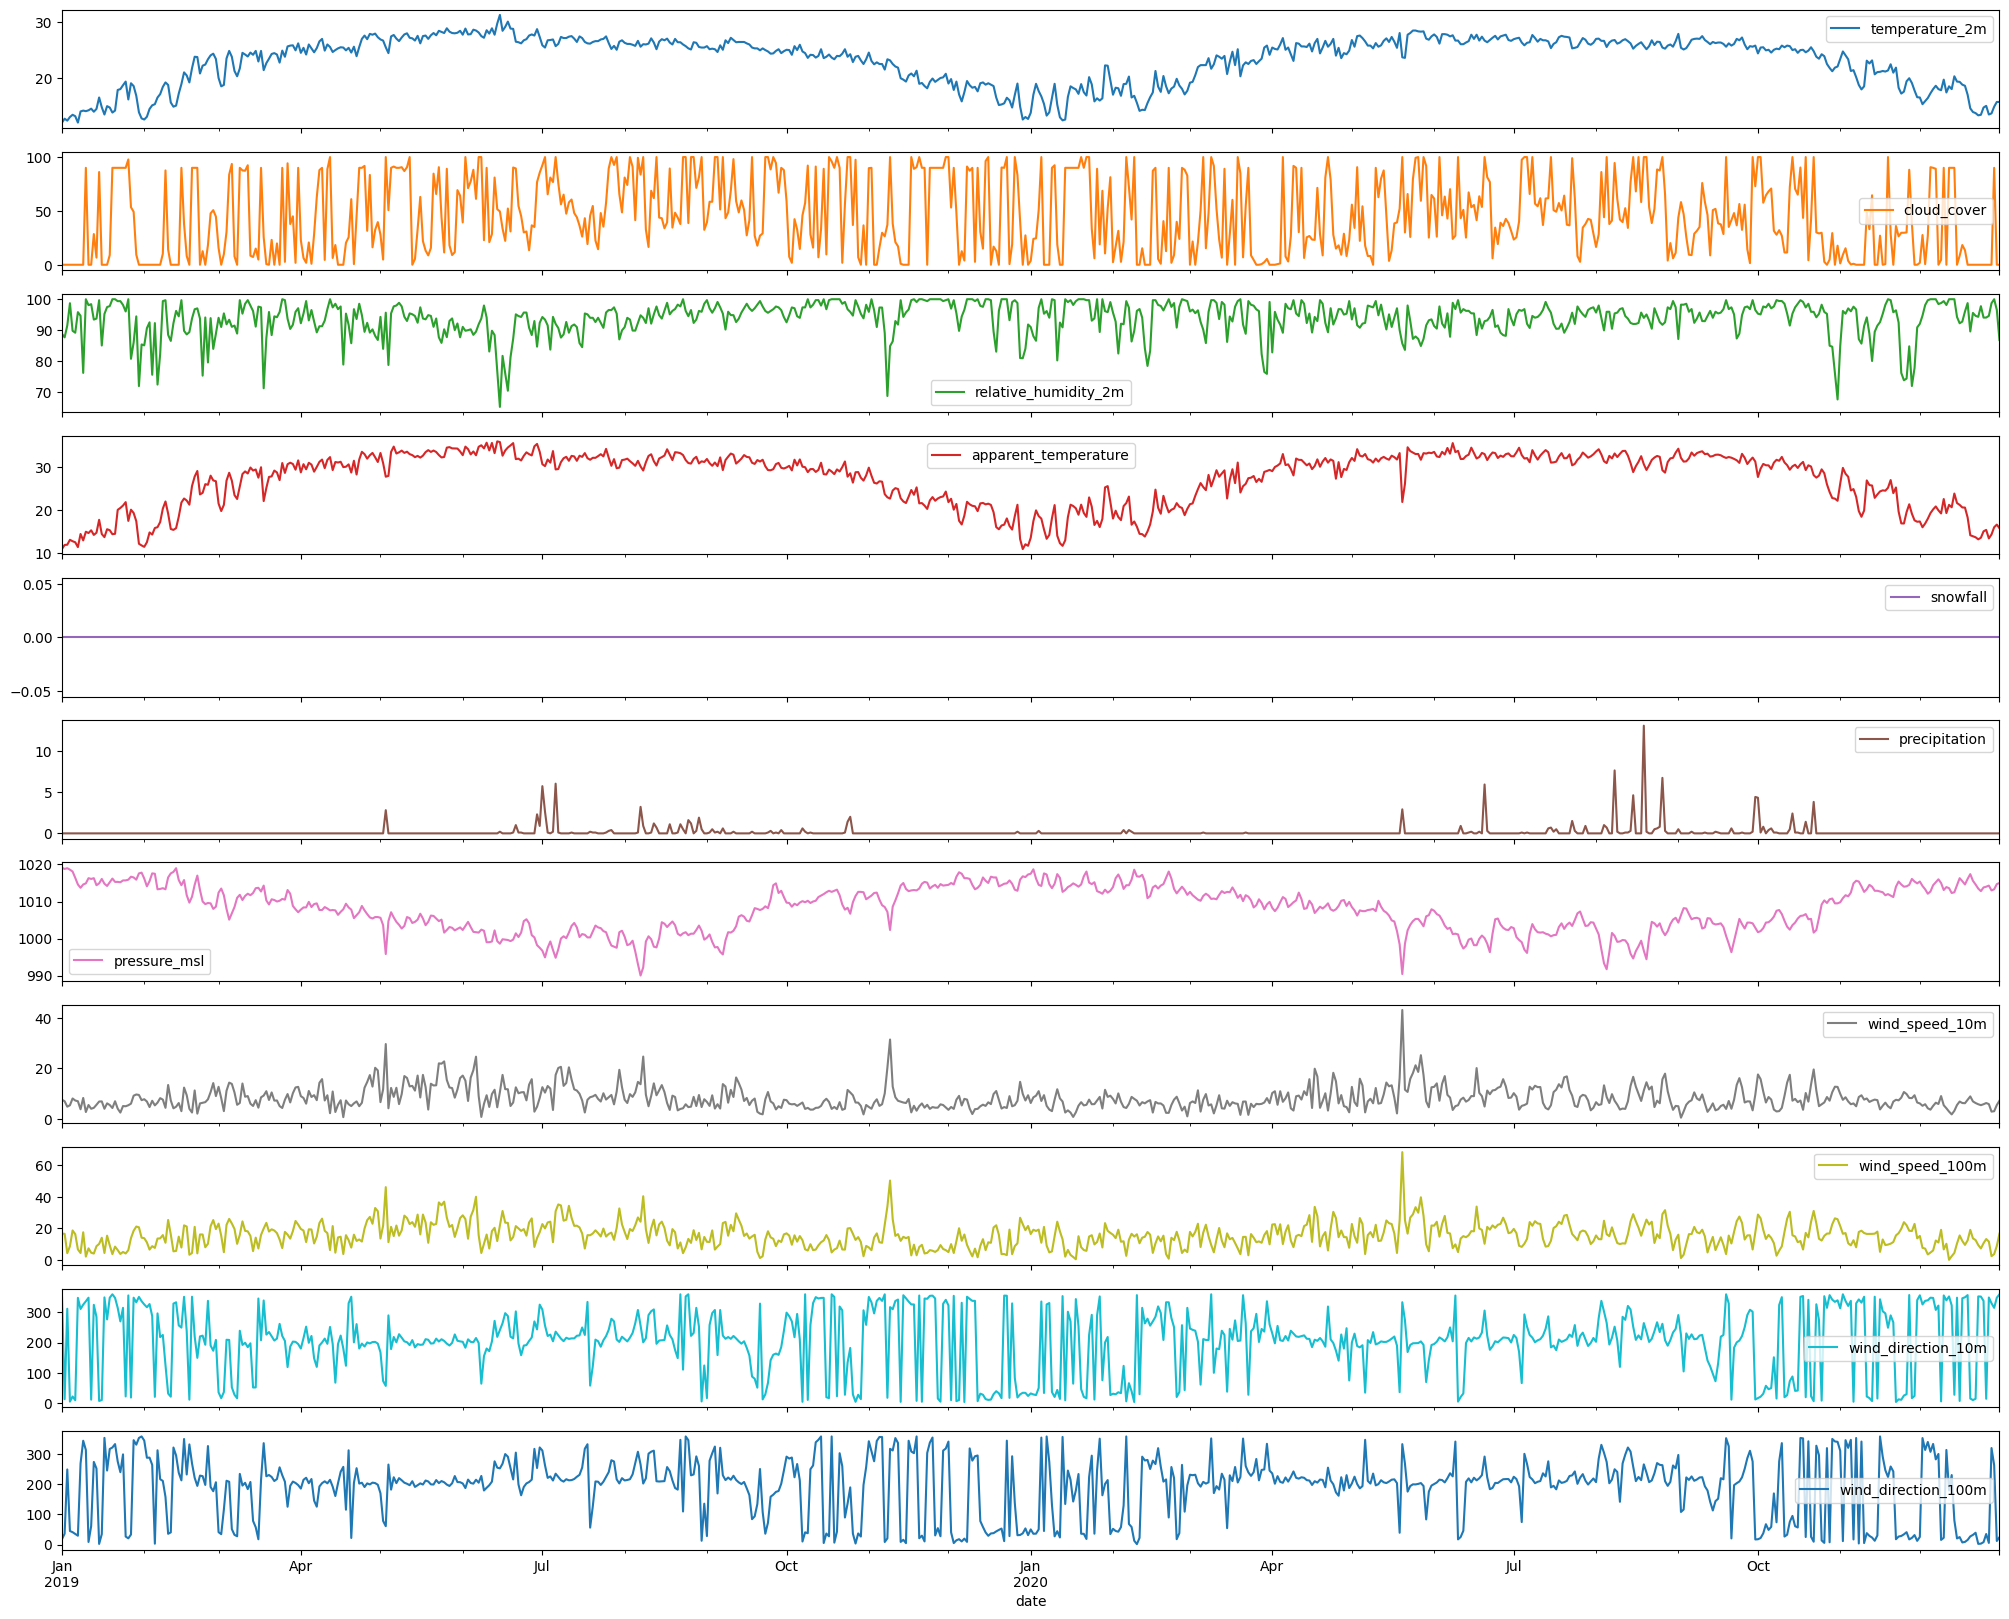

In [11]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'temperature_2m'}>,
        <Axes: title={'center': 'cloud_cover'}>,
        <Axes: title={'center': 'relative_humidity_2m'}>],
       [<Axes: title={'center': 'apparent_temperature'}>,
        <Axes: title={'center': 'snowfall'}>,
        <Axes: title={'center': 'precipitation'}>],
       [<Axes: title={'center': 'pressure_msl'}>,
        <Axes: title={'center': 'wind_speed_10m'}>,
        <Axes: title={'center': 'wind_speed_100m'}>],
       [<Axes: title={'center': 'wind_direction_10m'}>,
        <Axes: title={'center': 'wind_direction_100m'}>, <Axes: >]],
      dtype=object)

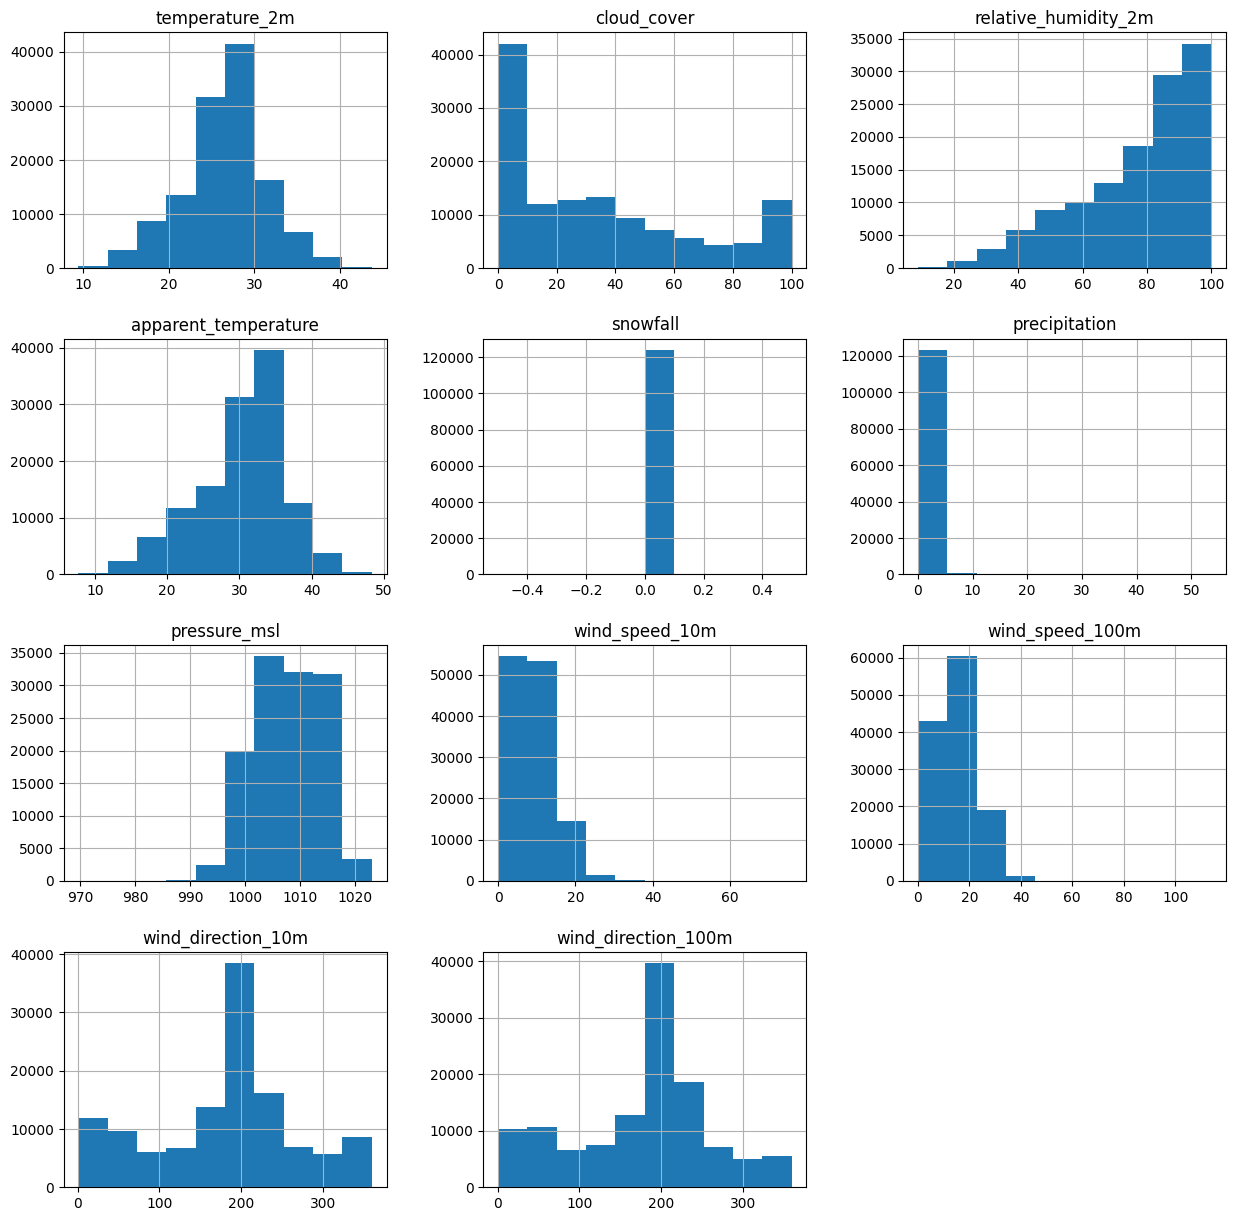

In [12]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [13]:
weth=weather_df_num['2023':'2024']
weth.head()

,temperature_2m,cloud_cover,relative_humidity_2m,apparent_temperature,snowfall,precipitation,pressure_msl,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
date,,,,,,,,,,,
2023-01-01 00:00:00+00:00,18.9025,26.1,96.920910,21.094494,0.0,0.0,1016.1,6.214563,9.565437,100.007920,160.201030
2023-01-01 01:00:00+00:00,19.2025,2.4,96.625250,21.574873,0.0,0.0,1017.1,5.771239,8.534353,86.423744,152.354110
2023-01-01 02:00:00+00:00,21.5025,0.6,87.031334,24.257072,0.0,0.0,1018.1,5.091168,10.853866,135.000100,174.289500
2023-01-01 03:00:00+00:00,23.5025,8.4,78.525734,26.135090,0.0,0.0,1018.9,6.915374,7.895416,38.659830,43.152412
2023-01-01 04:00:00+00:00,25.1525,25.8,71.133156,28.602562,0.0,0.0,1019.3,1.297998,1.800000,123.690094,143.130020


In [14]:
weather_y=weather_df_num.pop("apparent_temperature")
weather_x=weather_df_num

In [15]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [16]:
train_X.shape

(99148, 10)

In [17]:
train_y.shape

(99148,)

In [18]:
train_y.head()

date
2018-01-14 17:00:00+00:00    15.141762
2018-12-18 11:00:00+00:00    20.021141
2013-04-21 09:00:00+00:00    32.137196
2012-06-11 00:00:00+00:00    34.698593
2011-02-12 15:00:00+00:00    25.639223
Name: apparent_temperature, dtype: float64

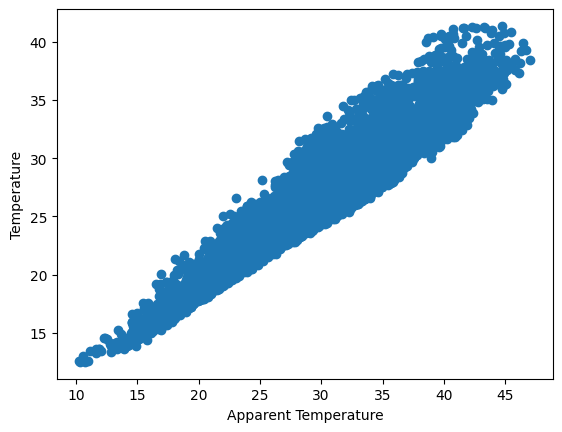

In [19]:
plt.scatter(weth.apparent_temperature, weth.temperature_2m)
plt.xlabel("Apparent Temperature")
plt.ylabel("Temperature")
plt.show()

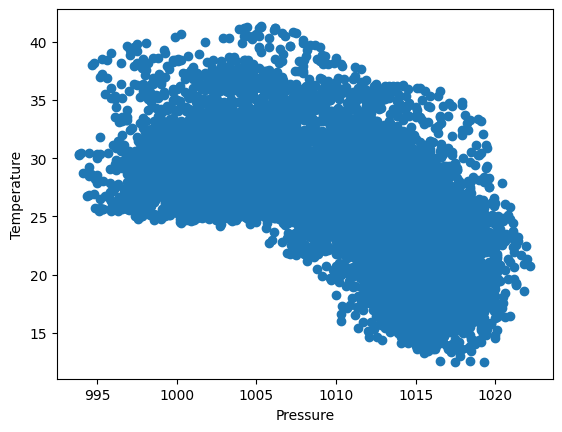

In [20]:
plt.scatter(weth.pressure_msl, weth.temperature_2m)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

In [21]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [22]:
prediction = model.predict(test_X)

In [23]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.3166624575649903

In [24]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.99


In [25]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date,,,
2023-04-11 13:00:00+00:00,33.565780,34.59,-1.024220
2014-08-18 05:00:00+00:00,38.994390,37.48,1.514390
2011-08-28 00:00:00+00:00,29.461308,29.79,-0.328692
2019-09-24 10:00:00+00:00,31.379040,31.47,-0.090960
2013-03-19 22:00:00+00:00,27.675340,28.01,-0.334660
...,...,...,...
2018-10-15 18:00:00+00:00,28.671394,28.92,-0.248606
2011-02-02 05:00:00+00:00,28.856934,28.44,0.416934
2022-09-17 07:00:00+00:00,38.633570,37.59,1.043570


In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [27]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.26135528063982577

In [28]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.99


In [29]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date,,,
2023-04-11 13:00:00+00:00,33.565780,33.24,0.325780
2014-08-18 05:00:00+00:00,38.994390,39.30,-0.305610
2011-08-28 00:00:00+00:00,29.461308,29.65,-0.188692
2019-09-24 10:00:00+00:00,31.379040,31.35,0.029040
2013-03-19 22:00:00+00:00,27.675340,27.76,-0.084660
...,...,...,...
2018-10-15 18:00:00+00:00,28.671394,28.85,-0.178606
2011-02-02 05:00:00+00:00,28.856934,28.39,0.466934
2022-09-17 07:00:00+00:00,38.633570,37.74,0.893570


In [30]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [31]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.15473425803332252

In [32]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 1.00


In [33]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date,,,
2023-04-11 13:00:00+00:00,33.565780,33.39,0.175780
2014-08-18 05:00:00+00:00,38.994390,38.18,0.814390
2011-08-28 00:00:00+00:00,29.461308,29.54,-0.078692
2019-09-24 10:00:00+00:00,31.379040,31.35,0.029040
2013-03-19 22:00:00+00:00,27.675340,27.76,-0.084660
...,...,...,...
2018-10-15 18:00:00+00:00,28.671394,28.68,-0.008606
2011-02-02 05:00:00+00:00,28.856934,28.42,0.436934
2022-09-17 07:00:00+00:00,38.633570,38.02,0.613570


In [34]:
from sklearn.metrics import r2_score

In [35]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.32
Residual sum of squares (MSE): 0.26
R2-score: 0.99


In [36]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.20
R2-score: 0.99


In [37]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.08
R2-score: 1.00


In [38]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(temperature_2m):
    result = adfuller(temperature_2m)
    labels = ['ADF test statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("Stationary: Strong evidence against the null hypothesis")
    else:
        print("Non-Stationary: Weak evidence against the null hypothesis")

# Assuming df1 is your DataFrame and 'Temperature' is the column you want to test
#adfuller_test(df1["Temperature"])